### Format text files into a CSV file  
folders: target_dir/category/text_files    

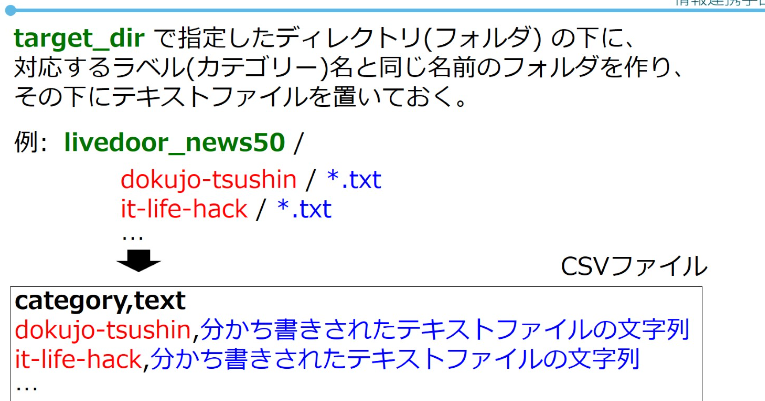

#### Import libraries  

In [2]:
import os, glob
import pandas as pd
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSStopFilter, LowerCaseFilter

#### Parameters  

In [3]:
wakati = True
target_dir = 'livedoor_news50'
csv_out = 'livedoor_news50.csv'

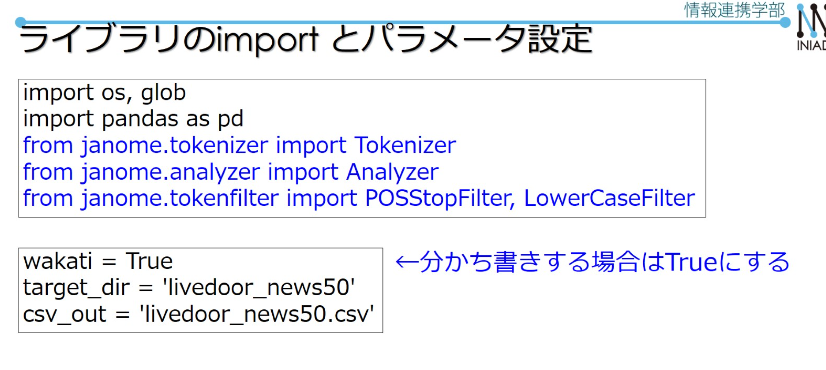

#### Setup for wakati  

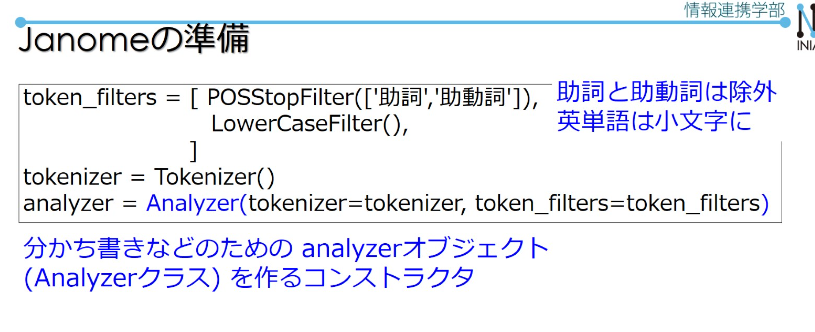

In [4]:
token_filters = [ POSStopFilter(['助詞','助動詞']),
                  LowerCaseFilter(),
                ]
tokenizer = Tokenizer()
analyzer = Analyzer(tokenizer=tokenizer, token_filters=token_filters)

#### Read text files  

In [5]:
file_pat = '*.txt'
dir_pat = os.path.join(target_dir, '*')

text = []
for d in glob.glob(dir_pat):  # for-loop of directories in target_dir
    if not os.path.isdir(d): continue  # skip if d is not a directory
    category = os.path.basename(d)  # use directory name as the category name
    full_pat = os.path.join(d, file_pat)  # generate full path name for text files
    n_files = 0  # counter for number of files
    for file in glob.glob(full_pat):  # for-loop of text files
        n_files += 1
        with open(file, 'r', encoding='utf-8') as f:
            lines = f.read().splitlines()  # if you want to omit newline character
            body = ' '.join(lines[2:])  # 1st line: URL, 2nd line: Date, so skip these lines
            if wakati:  # add space between words (wakati-gaki)
                body = ' '.join([t.base_form for t in analyzer.analyze(body)])
            text.append([category, body])
    print(n_files, 'files read for', category)

50 files read for dokujo-tsushin
50 files read for it-life-hack
50 files read for kaden-channel
50 files read for livedoor-homme
50 files read for movie-enter
50 files read for peachy
50 files read for smax
50 files read for sports-watch
50 files read for topic-news


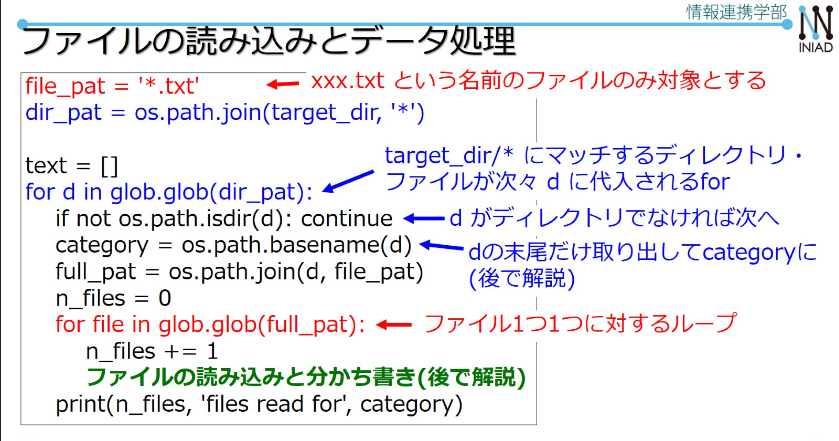

In [6]:
df = pd.DataFrame(text, columns=['category', 'text'])
print(df.shape)
print(df.info())
display(df.head())
display(df.tail())

(450, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  450 non-null    object
 1   text      450 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB
None


,category,text
0,dokujo-tsushin,友人 代表 スピーチ 、 独 女 どう こなす いる ？ もうすぐ ジューン ・ ブ...
1,dokujo-tsushin,ネット 断ち切れる 元 カレ 縁 携帯 電話 普及 する 以前 、 恋人 連絡 ツー...
2,dokujo-tsushin,相次ぐ 芸能人 “ すっぴん ” 披露 その 時 、 独 女 心境 ？ 「 男性...
3,dokujo-tsushin,ムダ 抵抗 ！ ？ 加 齢 現実 ヒップ 加 齢 変化 「 たわむ → 下がる ...
4,dokujo-tsushin,税金 払う の 私 たち ん ！ 6 月 支給 する れる 子ども 手当 、 当初 ...


,category,text
445,topic-news,ソフトバンク 対 au 激しい バトル ウラ 側 判明 ソフトバンク au iphone...
446,topic-news,反日 映画 ? 『 アジア 純真 』 日本 公開 物議 10 月 15 日 、 映画 『...
447,topic-news,堀江 氏 、 有料 メルマガ 1 億 円 稼ぐ 株式会社 ま ぐまぐ 代表 取締役 、 ...
448,topic-news,待ち 待つ 「 ios 」 改良 ユーザー 激怒 米 apple 現地 時間 10 月 ...
449,topic-news,死亡 する 原発 作業 員 妻 「 50 万 円 やる 国 帰る 」 福島 第 1 原発...


In [7]:
df.to_csv(csv_out, index=False)